In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [23]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [24]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

<ipython-input-24-0cdb964651be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [25]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [26]:
data = df.copy()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

data_encoded = pd.get_dummies(data)

print(data_encoded.head())

imputer = SimpleImputer(strategy='mean')
X = data_encoded.drop('num', axis=1)
X_imputed = imputer.fit_transform(X)


y = data_encoded['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0   63       145   233   True     150      2.3    0       False      True   
1   41       135   203  False     132      0.0    0       False      True   
2   57       140   192  False     148      0.4    0       False      True   
3   52       118   186  False     190      0.0    0       False      True   
4   57       110   201  False     126      1.5    0       False      True   

   cp_asymptomatic  ...  exang_False  exang_True  exang_FALSE  exang_TURE  \
0            False  ...         True       False        False       False   
1            False  ...         True       False        False       False   
2             True  ...         True       False        False       False   
3            False  ...         True       False        False       False   
4             True  ...        False        True        False       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0 

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
y_pred_optimized = grid_search.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 20}
Optimized Accuracy: 0.5604395604395604


In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Feature Importance:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Accuracy: 47.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.36      0.35      0.36        48
           2       0.22      0.23      0.22        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.27      0.27      0.27       182
weighted avg       0.48      0.48      0.48       182

Confusion Matrix:
[[64 15  5  4  1]
 [16 17  7  6  2]
 [ 4  7  5  5  1]
 [ 3  8  4  1  1]
 [ 2  0  2  2  0]]
Feature Importance:
age: 0.1471
trestbps: 0.1122
chol: 0.1534
fbs: 0.0218
thalch: 0.1181
oldpeak: 0.1223
sex_Female: 0.0032
sex_Male: 0.0090
cp_asymptomatic: 0.1145
cp_atypical angina: 0.0107
cp_non-anginal: 0.0036
cp_typical angina: 0.0049
restecg_lv hypertrophy: 0.0107
restecg_normal: 0.0243
restecg_st-t abnormality: 0.0036
exang_False: 0.0275
exang_True: 0.

Unique class labels in y_train: [0 1 3 2 4]


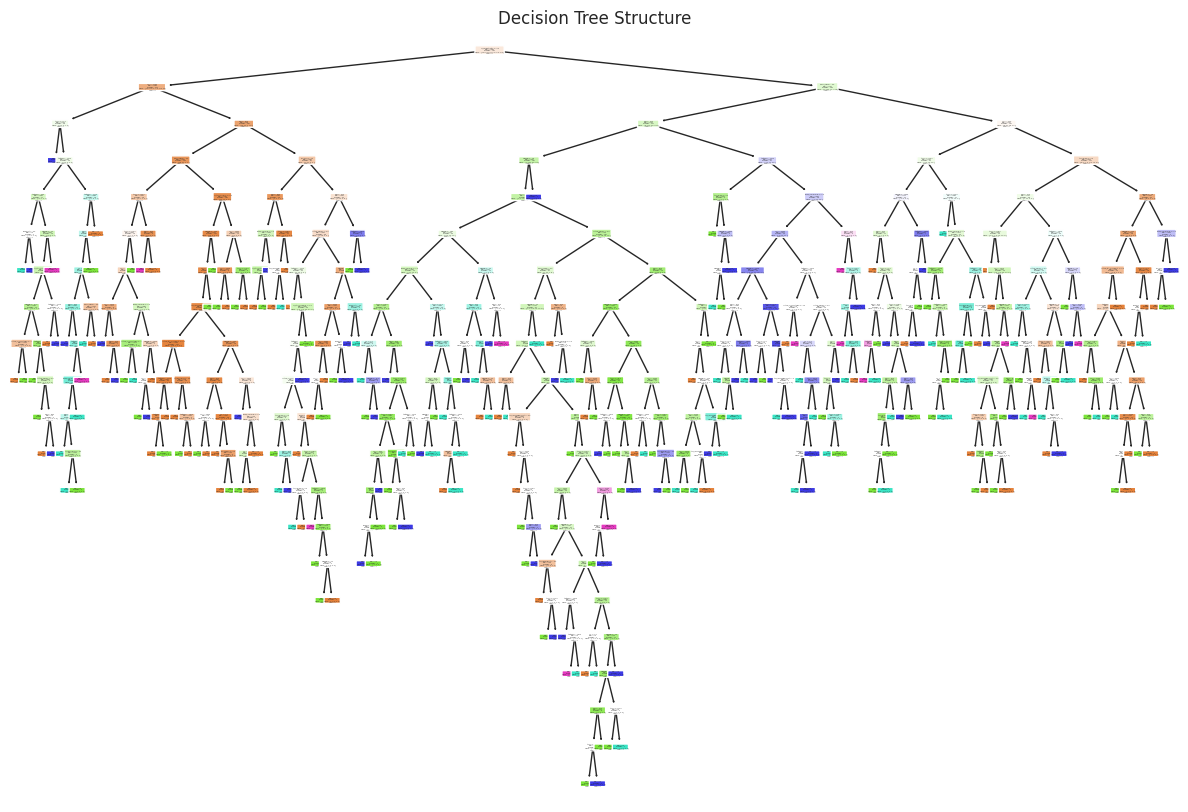

In [30]:
print("Unique class labels in y_train:", y_train.unique())

plt.figure(figsize=(15, 10))

class_labels = [str(int(label)) for label in y_train.unique()]
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_labels, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


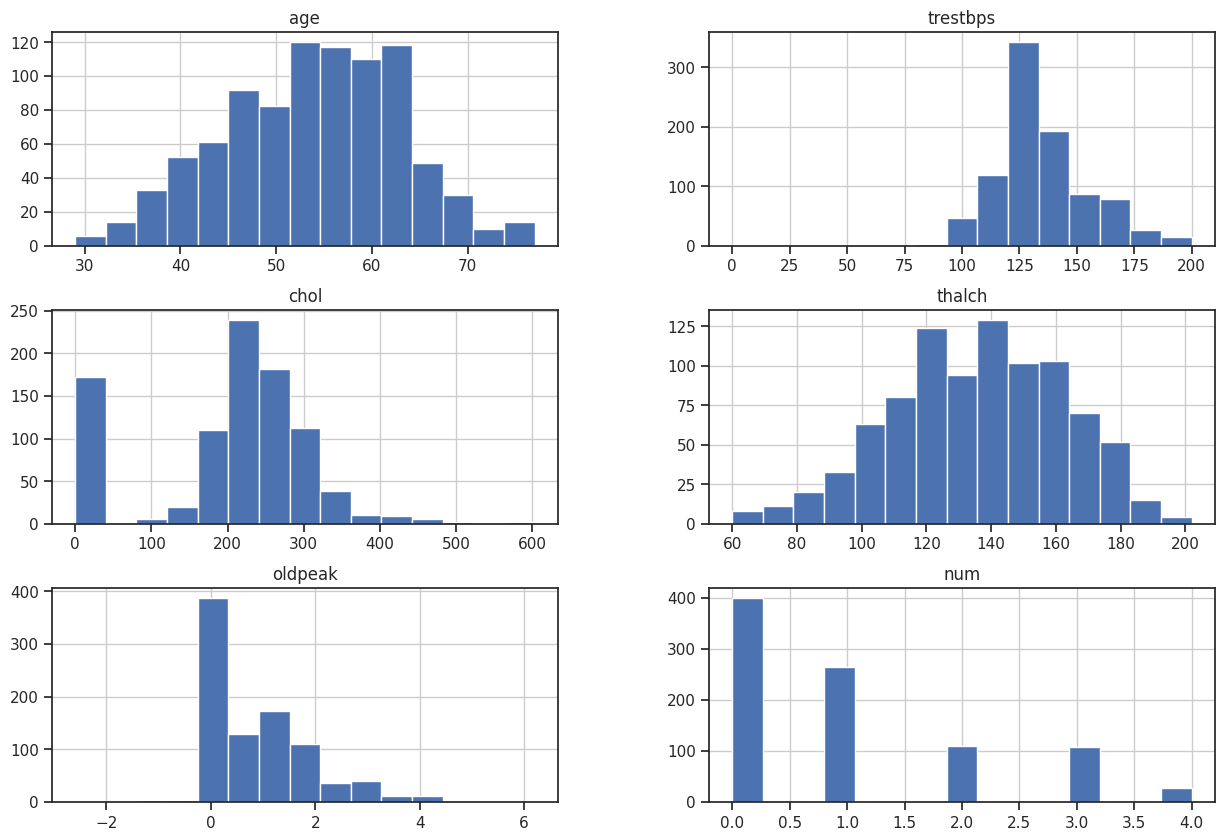

In [31]:
data.hist(bins=15, figsize=(15,10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

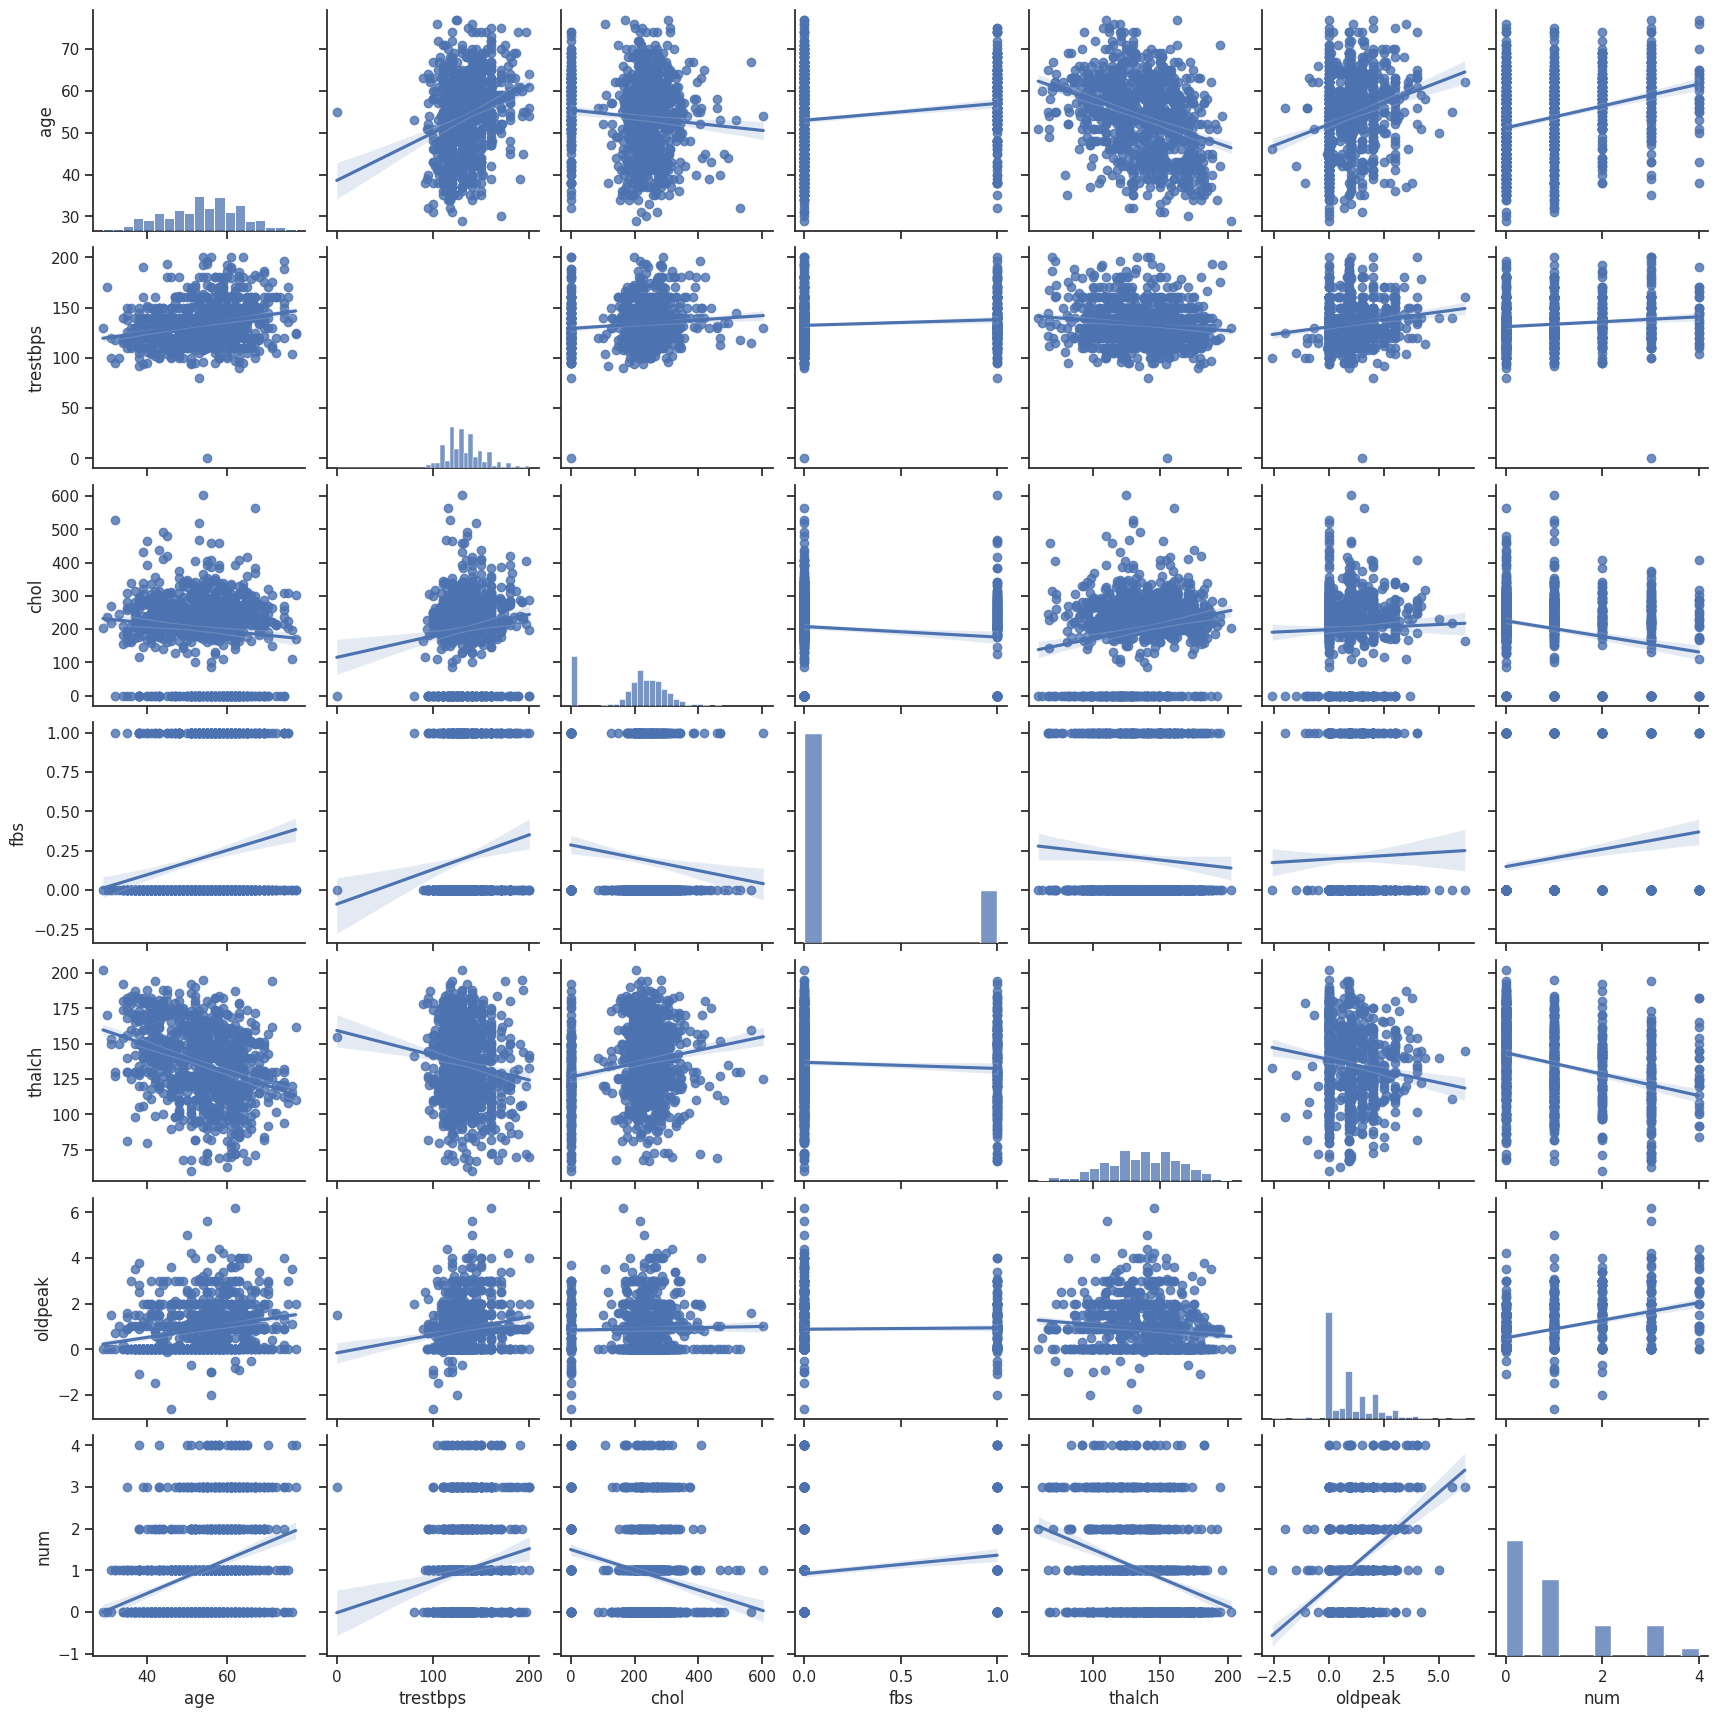

In [32]:
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, kind="reg")
plt.show()

Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans

Decision tree models have several hyperparameters that significantly influence their structure, performance, and ability to generalize. Understanding and tuning these hyperparameters is crucial for achieving optimal results.

One important hyperparameter is max_depth, which defines the maximum number of levels the tree can grow. Setting a low value prevents overfitting by limiting the tree's complexity, but it can lead to underfitting if the tree is too shallow to capture patterns in the data. On the other hand, a high value allows for more detailed splits, increasing the risk of overfitting.

2.What is the difference between the Label encoding and One-hot encoding?

Ans

Label Encoding and One-Hot Encoding are two techniques used to convert categorical data into numerical format, making it suitable for machine learning algorithms. These methods differ in their representation, implications, and suitability for different types of data.

Label Encoding assigns a unique integer to each category in the data. For instance, if the categories are ["Red", "Blue", "Green"], they might be encoded as [0, 1, 2]. This method is simple and memory-efficient since it uses only one column to represent the data. It is particularly useful for ordinal categorical variables, where the categories have a meaningful order, such as "Small", "Medium", and "Large." However, for nominal data (categories with no inherent order), Label Encoding can introduce bias because it implies an order or ranking among the categories. Algorithms might misinterpret the numerical encoding as having a relative magnitude or distance between categories, which does not exist in such cases.

On the other hand, One-Hot Encoding represents each category using binary columns. For a categorical variable with
𝑛
n unique categories,
𝑛
n columns are created, each corresponding to one category. For example, ["Red", "Blue", "Green"] would be represented as three columns: "Red" (1 for Red, 0 otherwise), "Blue" (1 for Blue, 0 otherwise), and "Green" (1 for Green, 0 otherwise). This method does not imply any order among categories, making it well-suited for nominal data. However, it can significantly increase the dimensionality of the dataset, especially when the number of unique categories is large. This higher dimensionality can lead to increased memory usage and computational cost